In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data=pd.read_csv("train_loan.csv")
test_data=pd.read_csv("test_loan.csv")

In [3]:
data=pd.concat([train_data,test_data],axis=0)

In [4]:
data.head(50)

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No
5,5417,4196.0,1.0,2,Graduate,Male,267.0,360.0,LP001011,Y,Yes,Urban,Yes
6,2333,1516.0,1.0,0,Not Graduate,Male,95.0,360.0,LP001013,Y,Yes,Urban,No
7,3036,2504.0,0.0,3+,Graduate,Male,158.0,360.0,LP001014,N,Yes,Semiurban,No
8,4006,1526.0,1.0,2,Graduate,Male,168.0,360.0,LP001018,Y,Yes,Urban,No
9,12841,10968.0,1.0,1,Graduate,Male,349.0,360.0,LP001020,N,Yes,Semiurban,No


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       902 non-null float64
Dependents           956 non-null object
Education            981 non-null object
Gender               957 non-null object
LoanAmount           954 non-null float64
Loan_Amount_Term     961 non-null float64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              978 non-null object
Property_Area        981 non-null object
Self_Employed        926 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 107.3+ KB


In [6]:
print(data["Loan_Amount_Term"].isnull().sum())
data[data["Loan_Amount_Term"].isnull()==True]

20


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
19,2600,3500.0,1.0,0,Graduate,Male,115.0,NaN,LP001041,Y,Yes,Urban,NaN
36,1828,1330.0,0.0,0,Graduate,Male,100.0,NaN,LP001109,N,Yes,Urban,No
44,4695,0.0,1.0,0,Not Graduate,Male,96.0,NaN,LP001136,Y,Yes,Urban,Yes
45,3410,0.0,1.0,0,Graduate,Female,88.0,NaN,LP001137,Y,No,Urban,No
73,4755,0.0,0.0,3+,Not Graduate,Male,95.0,NaN,LP001250,N,Yes,Semiurban,No
112,3572,4114.0,0.0,0,Not Graduate,Male,152.0,NaN,LP001391,N,Yes,Rural,No
165,3707,3166.0,1.0,0,Graduate,Male,182.0,NaN,LP001574,Y,Yes,Rural,No
197,1907,2365.0,1.0,0,Not Graduate,Female,120.0,NaN,LP001669,Y,No,Urban,No
223,7578,1010.0,1.0,0,Graduate,Male,175.0,NaN,LP001749,Y,Yes,Semiurban,No
232,3189,2598.0,1.0,0,Not Graduate,Male,120.0,NaN,LP001770,Y,No,Rural,No


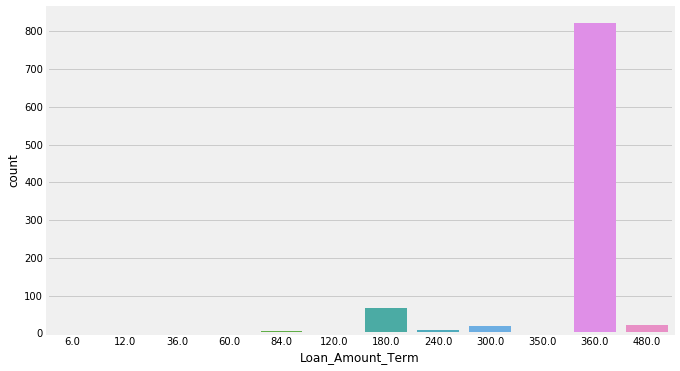

In [7]:
plt.figure(figsize=(10,6))
sns.countplot(data["Loan_Amount_Term"])

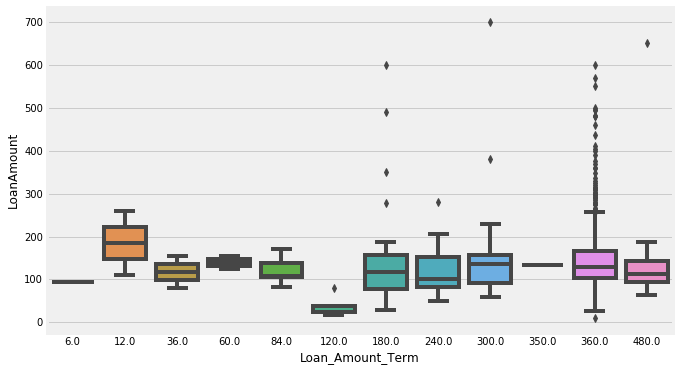

In [8]:
plt.figure(figsize=(10,6))
sns.boxplot(y="LoanAmount",x="Loan_Amount_Term",data=data)

In [9]:
def imputing(cols):
    Loan_Amount_Term=cols[0]
    LoanAmount=cols[1]
    if pd.isnull(Loan_Amount_Term):
        if LoanAmount<=100:
            return 120.0
        elif 200>=LoanAmount>100:
            return 360
        elif (LoanAmount>200):
            return 12.0
    else:
        return Loan_Amount_Term

In [10]:
data['Loan_Amount_Term']=data[['Loan_Amount_Term','LoanAmount']].apply(imputing,axis=1)

In [11]:
print(data["Loan_Amount_Term"].isnull().sum())

0


In [12]:
print(data["Self_Employed"].isnull().sum())
data[data["Self_Employed"].isnull()==True]

55


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
11,2500,1840.0,1.0,2,Graduate,Male,109.0,360.0,LP001027,Y,Yes,Urban,NaN
19,2600,3500.0,1.0,0,Graduate,Male,115.0,360.0,LP001041,Y,Yes,Urban,NaN
24,3717,2925.0,NaN,1,Graduate,Male,151.0,360.0,LP001052,N,Yes,Semiurban,NaN
29,3750,2083.0,1.0,2,Graduate,Female,120.0,360.0,LP001087,Y,No,Semiurban,NaN
30,4166,3369.0,NaN,1,Graduate,Male,201.0,360.0,LP001091,N,Yes,Urban,NaN
95,6782,0.0,NaN,0,Graduate,Male,NaN,360.0,LP001326,N,No,Urban,NaN
107,7333,0.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001370,N,No,Rural,NaN
111,2929,2333.0,1.0,0,Graduate,Female,139.0,360.0,LP001387,Y,Yes,Semiurban,NaN
114,5050,0.0,1.0,0,Graduate,Male,118.0,360.0,LP001398,Y,No,Semiurban,NaN
158,2980,2083.0,1.0,0,Graduate,Male,120.0,360.0,LP001546,Y,No,Rural,NaN


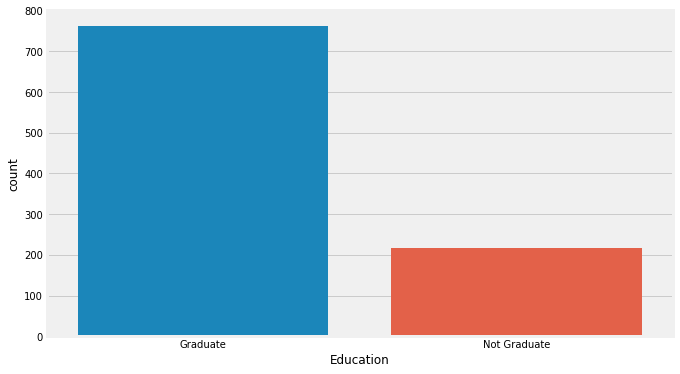

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(data["Education"])

In [14]:
def imputing1(cols):
    Education=cols[0]
    Self_Employed=cols[1]
    if pd.isnull(Self_Employed):
        if Education=="Graduate":
            return "Yes"
        else:
            return "No"
    else:
        return Self_Employed

In [15]:
data["Self_Employed"]=data[["Self_Employed","Education"]].apply(imputing1,axis=1)

In [16]:
print(data["Self_Employed"].isnull().sum())

0


In [17]:
print(data["Credit_History"].isnull().sum())
data[data["Credit_History"].isnull()==True]

79


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
16,3596,0.0,NaN,1,Not Graduate,Male,100.0,240.0,LP001034,Y,No,Urban,Not Graduate
24,3717,2925.0,NaN,1,Graduate,Male,151.0,360.0,LP001052,N,Yes,Semiurban,Graduate
30,4166,3369.0,NaN,1,Graduate,Male,201.0,360.0,LP001091,N,Yes,Urban,Graduate
42,2400,0.0,NaN,0,Graduate,Male,75.0,360.0,LP001123,Y,Yes,Urban,Graduate
79,3333,2166.0,NaN,3+,Not Graduate,Male,130.0,360.0,LP001264,Y,Yes,Semiurban,Not Graduate
83,6000,2250.0,NaN,0,Graduate,Male,265.0,360.0,LP001273,N,Yes,Semiurban,Graduate
86,3333,2000.0,NaN,2,Not Graduate,Male,99.0,360.0,LP001280,Y,Yes,Semiurban,Not Graduate
95,6782,0.0,NaN,0,Graduate,Male,NaN,360.0,LP001326,N,No,Urban,Graduate
117,2214,1398.0,NaN,1,Graduate,Male,85.0,360.0,LP001405,Y,Yes,Urban,Graduate
125,3692,0.0,NaN,0,Graduate,Female,93.0,360.0,LP001443,Y,No,Rural,Graduate


In [18]:
def imputing2(cols):
    Credit_History=cols[0]
    Loan_Status=cols[1]
    if pd.isnull(Credit_History):
        if Loan_Status=="Y":
            return 1
        else:
            return 0
    else:
        return Credit_History

In [19]:
data["Credit_History"]=data[["Credit_History","Loan_Status"]].apply(imputing2,axis=1)

In [20]:
print(data["Credit_History"].isnull().sum())

0


In [21]:
print(data["Loan_Status"].isnull().sum())

367


In [22]:
def imputing3(cols):
    Credit_History=cols[0]
    Loan_Status=cols[1]
    if pd.isnull(Loan_Status):
        if Credit_History!=0:
            return "Y"
        else:
            return "N"
    else:
        return Loan_Status

In [23]:
data["Loan_Status"]=data[["Credit_History","Loan_Status"]].apply(imputing3,axis=1)

In [24]:
print(data["Loan_Status"].isnull().sum())

0


In [25]:
print(data["Married"].isnull().sum())
data[data["Married"].isnull()==True]

3


,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed
104,3816,754.0,1.0,NaN,Graduate,Male,160.0,360.0,LP001357,Y,NaN,Urban,Graduate
228,4758,0.0,1.0,NaN,Graduate,Male,158.0,480.0,LP001760,Y,NaN,Semiurban,Graduate
435,10047,0.0,1.0,NaN,Graduate,Female,NaN,240.0,LP002393,Y,NaN,Semiurban,Graduate


In [26]:
def imputing4(cols):
    CoapplicantIncome=cols[0]
    Married=cols[1]
    if pd.isnull(Married):
        if CoapplicantIncome>0:
            return "Yes"
        else:
            return "No"
    else:
        return Married

In [27]:
data["Married"]=data[["CoapplicantIncome","Married"]].apply(imputing4,axis=1)

In [28]:
data["Dependents"]=data["Dependents"].fillna(1)

In [29]:
data["LoanAmount"]=data["LoanAmount"].fillna(np.mean(data["LoanAmount"]))

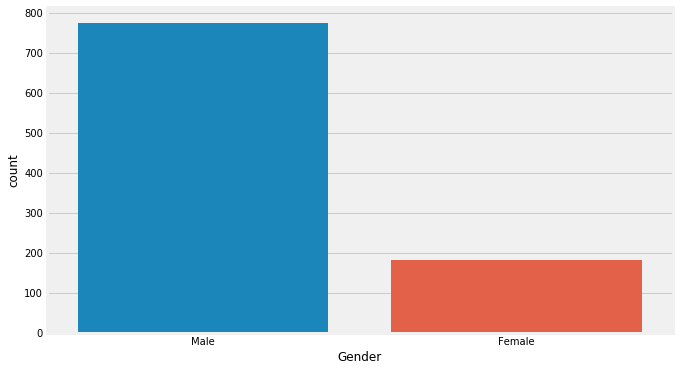

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(data["Gender"])

In [31]:
data["Gender"]=data["Gender"].fillna("Male")
data["Dependents"]=data["Dependents"].replace("3+",3)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 366
Data columns (total 13 columns):
ApplicantIncome      981 non-null int64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null float64
Dependents           981 non-null object
Education            981 non-null object
Gender               981 non-null object
LoanAmount           981 non-null float64
Loan_Amount_Term     981 non-null float64
Loan_ID              981 non-null object
Loan_Status          981 non-null object
Married              981 non-null object
Property_Area        981 non-null object
Self_Employed        981 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 127.3+ KB


In [33]:
data.drop(["Loan_ID"],axis=1,inplace=True)
data["Dependents"].replace("3+",3)
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1.0,0,Graduate,Male,142.51153,360.0,Y,No,Urban,Graduate
1,4583,1508.0,1.0,1,Graduate,Male,128.00000,360.0,N,Yes,Rural,Graduate
2,3000,0.0,1.0,0,Graduate,Male,66.00000,360.0,Y,Yes,Urban,Graduate
3,2583,2358.0,1.0,0,Not Graduate,Male,120.00000,360.0,Y,Yes,Urban,Not Graduate
4,6000,0.0,1.0,0,Graduate,Male,141.00000,360.0,Y,No,Urban,Graduate


In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
encoder=LabelEncoder()
data["Credit_History"]=encoder.fit_transform(data["Credit_History"])
data["Education"]=encoder.fit_transform(data["Education"])
data["Gender"]=encoder.fit_transform(data["Gender"])
data["Loan_Amount_Term"]=encoder.fit_transform(data["Loan_Amount_Term"])
data["Loan_Status"]=encoder.fit_transform(data["Loan_Status"])
data["Married"]=encoder.fit_transform(data["Married"])
data["Property_Area"]=encoder.fit_transform(data["Property_Area"])
data["Self_Employed"]=encoder.fit_transform(data["Self_Employed"])

In [36]:
data.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_Status,Married,Property_Area,Self_Employed
0,5849,0.0,1,0,0,1,142.51153,10,1,0,2,0
1,4583,1508.0,1,1,0,1,128.00000,10,0,1,0,0
2,3000,0.0,1,0,0,1,66.00000,10,1,1,2,0
3,2583,2358.0,1,0,1,1,120.00000,10,1,1,2,1
4,6000,0.0,1,0,0,1,141.00000,10,1,0,2,0


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [38]:
x=data.drop(["Loan_Status"],axis=1)
y=data["Loan_Status"]

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
scalar=StandardScaler()
x_train=scalar.fit_transform(x_train)
x_test=scalar.transform(x_test)

In [40]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [41]:
def creatingmodel(optimizer="adam",loss="binary_crossentropy"):
    model=Sequential()
    model.add(Dense(100,input_dim=11,activation="relu"))
    model.add(Dense(75,activation="relu"))
    model.add(Dense(50,activation="relu"))
    model.add(Dense(25,activation="sigmoid"))
    model.add(Dense(11,activation="sigmoid"))
    model.add(Dense(5,activation="sigmoid"))
    model.add(Dense(1,activation="sigmoid"))
    model.compile(loss=loss,optimizer=optimizer,metrics=["accuracy"])
    return model
model=creatingmodel()
callbacks=EarlyStopping(monitor="val_loss",mode="min",patience=75)

In [42]:
model.fit(x=x_train,y=y_train,
         validation_data=(x_test,y_test),
         epochs=500,batch_size=5,verbose=1,callbacks=[callbacks])

Train on 735 samples, validate on 246 samples
Epoch 1/500
735/735 [==============================] - 1s 753us/sample - loss: 0.5838 - accuracy: 0.7184 - val_loss: 0.5341 - val_accuracy: 0.7033
Epoch 2/500
735/735 [==============================] - 0s 280us/sample - loss: 0.4898 - accuracy: 0.7184 - val_loss: 0.4848 - val_accuracy: 0.7033
Epoch 3/500
735/735 [==============================] - 0s 273us/sample - loss: 0.4417 - accuracy: 0.8884 - val_loss: 0.4512 - val_accuracy: 0.8780
Epoch 4/500
735/735 [==============================] - 0s 273us/sample - loss: 0.4077 - accuracy: 0.8993 - val_loss: 0.4205 - val_accuracy: 0.8821
Epoch 5/500
735/735 [==============================] - 0s 274us/sample - loss: 0.3850 - accuracy: 0.8898 - val_loss: 0.4354 - val_accuracy: 0.8496
Epoch 6/500
735/735 [==============================] - 0s 270us/sample - loss: 0.3604 - accuracy: 0.9007 - val_loss: 0.3977 - val_accuracy: 0.8780
Epoch 7/500
735/735 [==============================] - 0s 280us/sample -

Epoch 56/500
735/735 [==============================] - 0s 262us/sample - loss: 0.2827 - accuracy: 0.9116 - val_loss: 0.4462 - val_accuracy: 0.8415
Epoch 57/500
735/735 [==============================] - 0s 267us/sample - loss: 0.2794 - accuracy: 0.9143 - val_loss: 0.4141 - val_accuracy: 0.8618
Epoch 58/500
735/735 [==============================] - 0s 269us/sample - loss: 0.2726 - accuracy: 0.9184 - val_loss: 0.4298 - val_accuracy: 0.8577
Epoch 59/500
735/735 [==============================] - 0s 266us/sample - loss: 0.2725 - accuracy: 0.9197 - val_loss: 0.4374 - val_accuracy: 0.8537
Epoch 60/500
735/735 [==============================] - 0s 266us/sample - loss: 0.2699 - accuracy: 0.9197 - val_loss: 0.4532 - val_accuracy: 0.8455
Epoch 61/500
735/735 [==============================] - 0s 269us/sample - loss: 0.2687 - accuracy: 0.9211 - val_loss: 0.4322 - val_accuracy: 0.8577
Epoch 62/500
735/735 [==============================] - 0s 267us/sample - loss: 0.2725 - accuracy: 0.9184 - val_

In [43]:
loss=pd.DataFrame(model.history.history)
loss.tail()

,loss,accuracy,val_loss,val_accuracy
101,0.246253,0.927891,0.446462,0.857724
102,0.245945,0.927891,0.452457,0.853659
103,0.254957,0.925170,0.444526,0.861789
104,0.248578,0.922449,0.443347,0.861789
105,0.244795,0.926531,0.442610,0.853659


<Figure size 720x432 with 0 Axes>

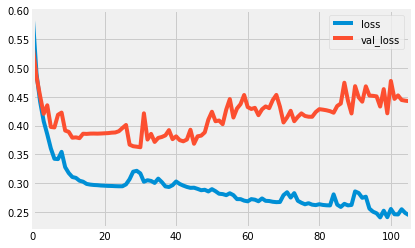

In [44]:
plt.figure(figsize=(10,6))
loss[["loss","val_loss"]].plot()

<Figure size 720x432 with 0 Axes>

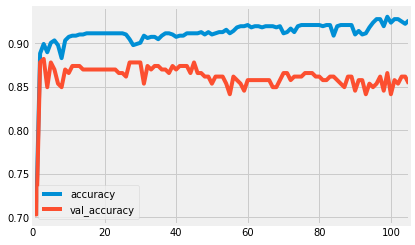

In [45]:
plt.figure(figsize=(10,6))
loss[["accuracy","val_accuracy"]].plot()

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import accuracy_score,r2_score
y_pred=model.predict_classes(x_test)

In [47]:
# analysing the results
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[ 45  28]
 [  8 165]]
              precision    recall  f1-score   support

           0       0.85      0.62      0.71        73
           1       0.85      0.95      0.90       173

    accuracy                           0.85       246
   macro avg       0.85      0.79      0.81       246
weighted avg       0.85      0.85      0.85       246

0.8536585365853658


In [48]:
scores=model.evaluate(x_test,y_test)
print(model.metrics_names[1],scores[1]*100)

246/246 [==============================] - 0s 28us/sample - loss: 0.4426 - accuracy: 0.8537
accuracy 85.36585569381714


In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rfc=RandomForestClassifier(n_estimators=100,random_state=6)

In [51]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=6, verbose=0,
                       warm_start=False)

In [52]:
y_pred1=rfc.predict(x_test)

In [53]:
# analysing the results
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))

[[ 44  29]
 [  1 172]]
              precision    recall  f1-score   support

           0       0.98      0.60      0.75        73
           1       0.86      0.99      0.92       173

    accuracy                           0.88       246
   macro avg       0.92      0.80      0.83       246
weighted avg       0.89      0.88      0.87       246

0.8780487804878049


In [54]:
from sklearn.naive_bayes import  MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score,r2_score

In [ ]:
nb=MultinomialNB()
knn=KNeighborsClassifier(n_neighbors=5)
lg=LogisticRegression()
dc=DecisionTreeClassifier()
rnf=RandomForestClassifier()
sv=SVC(C=100, degree=1,gamma= 0.0001,kernel='poly')
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10)
voting_clf=VotingClassifier(estimators=[('lr',lg),
                                        ('rf',rnf),
                                        ('dt',dc),
                                        ('kn',knn),
                                        ('nby',nb),
                                        ('svm',sv)],voting='hard')
voting_clf.fit(x_train,y_train)
y_pred_v=voting_clf.predict(x_test)
print("voting classifier")
print(accuracy_score(y_test,y_pred_v))

for clf in (nb,knn,lg,dc,rnf,sv):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    print(clf.__class__.__name__,accuracy_score(y_test,y_pred))

voting classifier
0.8658536585365854
MultinomialNB 0.4878048780487805
KNeighborsClassifier 0.6747967479674797
LogisticRegression 0.8780487804878049
DecisionTreeClassifier 0.7682926829268293
RandomForestClassifier 0.8739837398373984
